In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

## Creamos los df  Metadata y Reviews

In [2]:
folder_path = 'Google Maps//metadata-sitios//'
dfmetadata = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        dfaux = pd.read_json(file_path, lines=True)
        dfmetadata = pd.concat([dfmetadata, dfaux], ignore_index=True)

In [3]:
#Cargo los json de reviews en un solo df
folder_path = 'Google Maps//reviews-estados//review-New_York//'
dfreviews = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        dfaux = pd.read_json(file_path, lines=True)
        dfreviews = pd.concat([dfreviews, dfaux], ignore_index=True)

### EDA dfreviews

In [4]:
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB


In [5]:
dfreviews.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,1.149982e+20,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,1.171782e+20,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [6]:
#Transformamos la columna 'time' a formato date
dfreviews['time'] = pd.to_datetime(dfreviews['time'], unit='ms')

In [7]:
dfreviews.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,2020-10-23 23:13:15.361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,2021-05-04 19:37:17.403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,2020-08-14 19:01:02.039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,1.149982e+20,Fashion Fiinds,2018-12-02 18:04:22.044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,1.171782e+20,Andres Rieloff,2020-08-13 00:38:17.718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [8]:
dfreviews.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1163593
pics       2598344
resp       2436003
gmap_id          0
dtype: int64

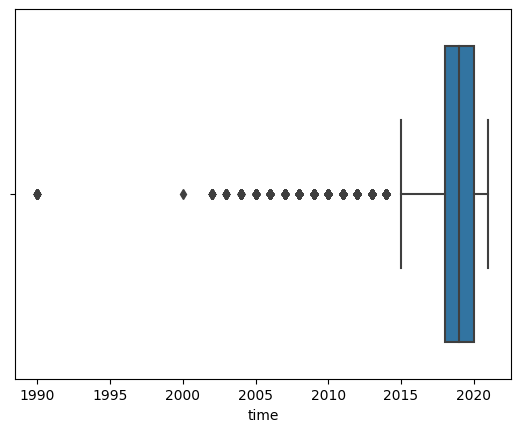

In [9]:
''' hago un boxplot con los años de la columna time '''
sns.boxplot(x=dfreviews['time'].dt.year, data = dfreviews)
plt.show()

In [10]:
#Año menor de los registros
dfreviews['time'].dt.year.min()

1990

In [11]:
#Año mayor de los registros 2021
dfreviews['time'].dt.year.max()

2021

In [12]:
# Reviso cuantos valores unicos hay en el df (7841)
dfreviews['gmap_id'].nunique()

70444

In [13]:

# creo un array de esos valores unicos 
gmap_id_unique = dfreviews['gmap_id'].unique()
# lo convierto en una lista  de 7841 ids
gmap_id_unique = gmap_id_unique.tolist()

In [14]:
#total de gmap_id 70.444
len(gmap_id_unique)

70444

## EDA METADATA

In [15]:
dfmetadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 346.2+ MB


In [26]:
dfmetadata.isnull().sum()

name                     37
address               80511
gmap_id                   0
description         2770722
latitude                  0
longitude                 0
category              17419
avg_rating                0
num_of_reviews            0
price               2749808
hours                787405
MISC                 690834
state                746455
relative_results     295058
url                       0
dtype: int64

In [60]:
dfmetadata.head(10)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
5,Matrix International Textiles,"Matrix International Textiles, 1363 S Bonnie B...",0x80c2cf163db6bc89:0x219484e2edbcfa41,None,34.015505,-118.181839,[Fabric store],3.5,6,None,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5:30PM,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,[Restaurant],4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
7,Polished Nail Salon & Spa,"Polished Nail Salon & Spa, 1330 Hickman Rd, Wa...",0x87ec238afdd8837b:0x2f43f2b12142bff5,None,41.614198,-93.847269,"[Nail salon, Waxing hair removal service]",4.0,86,None,"[[Thursday, 9AM–8PM], [Friday, 9AM–8PM], [Satu...",{'From the business': ['Identifies as women-le...,Open ⋅ Closes 8PM,"[0x87ec2481df68e107:0x2978d64e14ca8313, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"[Bakery, Health food restaurant]",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
9,PeepNotes,None,0x87ee85ac3cb23b4d:0x4cd1435fddc046b1,None,41.846035,-93.756118,"[Greeting card shop, Service establishment]",5.0,1,None,"[[Thursday, 7AM–8PM], [Friday, 7AM–8PM], [Satu...",None,Open ⋅ Closes 8PM,"[0x87ee915d9604ea6b:0x797354b58dacd391, 0x87ee...",https://www.google.com/maps/place//data=!4m2!3...


In [61]:
# filtramos los gmap id y nos quedamos solamente con los de NY
dfmetadata_NY = dfmetadata[dfmetadata['gmap_id'].isin(gmap_id_unique)]

dfmetadata_NY.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
59,T-Mobile,"T-Mobile, 3923 103rd St, Queens, NY 11368",0x89c25fc9494dce47:0x6d63c807b59a55,None,40.750146,-73.862536,"[Cell phone store, Electronic parts supplier, ...",3.5,95,$$,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 8PM,"[0x89c25fc7a91c609f:0xb103d6a261373fd, 0x89c25...",https://www.google.com/maps/place//data=!4m2!3...
195,Gillespie Chevrolet Parts,"Gillespie Chevrolet Parts, 128 Cayuga St, Unio...",0x89d0ba60bb7d710f:0x877e749ac7f9304a,None,42.840487,-76.692377,[Auto parts store],4.6,18,None,"[[Thursday, 7:30AM–8PM], [Friday, 7:30AM–5PM],...","{'Service options': ['In-store shopping'], 'Ac...",Open ⋅ Closes 8PM,"[0x89d0ab78eb57aca9:0x3a78b7d92d2e3950, 0x89d0...",https://www.google.com/maps/place//data=!4m2!3...
328,Arcana Juventa Anti-Aging Spa,"Arcana Juventa Anti-Aging Spa, 14 Brighton 11t...",0x89c244688b7609cd:0x205e2d8d173dd35e,None,40.582130,-73.956333,"[Spa, Waterproofing company]",4.1,15,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",None,Permanently closed,"[0x89c2446bdf00743d:0x1a016c5e3c603c88, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
334,Horizon Health Care Staffing,"Horizon Health Care Staffing, 101 Ellis St # M...",0x89c3b5606048fd35:0x372ca4b707b21213,None,40.517670,-74.242485,[Employment agency],3.9,8,None,None,"{'Health & safety': ['Appointment required'], ...",Open now,"[0x89c24e8123a04bdf:0x647442f3bc28496, 0x89c24...",https://www.google.com/maps/place//data=!4m2!3...
432,NYC Parking Manhattan Avenue. Garage Corporation.,NYC Parking Manhattan Avenue. Garage Corporati...,0x89c2f6146dd4b907:0x5a6b44a7f6b8a76c,None,40.807305,-73.954636,[Parking garage],3.7,8,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...",{'Accessibility': ['Wheelchair accessible entr...,Open 24 hours,"[0x89c2f613135dfba3:0xe185cc5d2b02df0f, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


In [28]:
# Reviso cuantos valores unicos hay en el df (70.444)
dfmetadata_NY['gmap_id'].nunique()

70444

In [62]:
# 71.106 entradas

dfmetadata_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71106 entries, 59 to 3024976
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              71106 non-null  object 
 1   address           70847 non-null  object 
 2   gmap_id           71106 non-null  object 
 3   description       11723 non-null  object 
 4   latitude          71106 non-null  float64
 5   longitude         71106 non-null  float64
 6   category          71069 non-null  object 
 7   avg_rating        71106 non-null  float64
 8   num_of_reviews    71106 non-null  int64  
 9   price             14089 non-null  object 
 10  hours             61329 non-null  object 
 11  MISC              63073 non-null  object 
 12  state             62008 non-null  object 
 13  relative_results  67991 non-null  object 
 14  url               71106 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 8.7+ MB


In [63]:
#Nulos en metadata
dfmetadata_NY.isnull().sum()

name                    0
address               259
gmap_id                 0
description         59383
latitude                0
longitude               0
category               37
avg_rating              0
num_of_reviews          0
price               57017
hours                9777
MISC                 8033
state                9098
relative_results     3115
url                     0
dtype: int64

In [64]:
filas_con_nulos = dfmetadata_NY[dfmetadata_NY['category'].isnull()]

print(filas_con_nulos)

                                                      name  \
11177                                      Salimar 2 Corp.   
37750                                      Salimar 2 Corp.   
362187           LIShore Shinnecock Observatory and Webcam   
394496                            Mr Gug's Countryside Inc   
423951                                         Minq Lounge   
571983                                     Ko Custom Whips   
598045                                       Gigi Cafe Inc   
645751                                   Sal's Bar & Grill   
672253                                30 Rockefeller Plaza   
704382                                        Van's Tavern   
719372                       Garnerville Industrial Center   
749420                           Extreme Auto Recovery Inc   
765818                                    Stuyvesant Falls   
951484                                         Doyle's Pub   
1559665                                        Viele's Inc   
1835902 

In [65]:
filas_con_nulos.head(10)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
11177,Salimar 2 Corp.,"Salimar 2 Corp., 357 E 138th St, Bronx, NY 10454",0x89c2f5c34a58b183:0x166aa581f3e8dfd8,None,40.809756,-73.924038,None,3.9,8,None,None,None,None,None,https://www.google.com/maps/place//data=!4m2!3...
37750,Salimar 2 Corp.,"Salimar 2 Corp., 357 E 138th St, Bronx, NY 10454",0x89c2f5c34a58b183:0x166aa581f3e8dfd8,None,40.809756,-73.924038,None,3.9,8,None,None,None,None,None,https://www.google.com/maps/place//data=!4m2!3...
362187,LIShore Shinnecock Observatory and Webcam,"LIShore Shinnecock Observatory and Webcam, 373...",0x89e8edabe88b6141:0xa16ff7f059a1dcfc,None,40.842061,-72.478244,None,4.6,18,None,"[[Friday, Open 24 hours], [Saturday, Open 24 h...",None,Open 24 hours,"[0x89e8edabe12c3cf1:0x66d138e3b6ae797d, 0x89e8...",https://www.google.com/maps/place//data=!4m2!3...
394496,Mr Gug's Countryside Inc,"Mr Gug's Countryside Inc, 1023 NY-52, Carmel H...",0x89dd4e4ba77ef3d3:0xf0268fa31c57b8e6,None,41.487957,-73.677999,None,4.3,14,None,None,None,None,"[0x89dd4f9d1c43593b:0x7ff94aa46237f037, 0x89dd...",https://www.google.com/maps/place//data=!4m2!3...
423951,Minq Lounge,"Minq Lounge, 394 W Main St, Rochester, NY 14608",0x89d6b4f68d6aaaab:0xb60f76f925070b0a,None,43.153524,-77.623631,None,4.2,28,None,"[[Thursday, Closed], [Friday, 6PM–12AM], [Satu...",None,Closed ⋅ Opens 6PM Fri,"[0x89d6b5a7b9c71367:0x1def1ad72c1b1077, 0x89d6...",https://www.google.com/maps/place//data=!4m2!3...
571983,Ko Custom Whips,"Ko Custom Whips, 3855 Boston Rd, Bronx, NY 10466",0x89c28cd204234481:0x7fcbd822d914b2cf,None,40.882538,-73.836504,None,3.6,15,None,"[[Wednesday, 9AM–7PM], [Thursday, 9AM–7PM], [F...",None,Permanently closed,"[0x89c28cd09f8ad473:0x12e2964a0ab98007, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
598045,Gigi Cafe Inc,"Gigi Cafe Inc, 958 3rd Ave, New York, NY 10022",0x89c258e5b3ca5a45:0x7fd4ebd47200ca,Outlet of a quick-bite deli chain purveying st...,40.760562,-73.967525,None,3.6,28,$,"[[Wednesday, 5AM–9PM], [Thursday, 5AM–9PM], [F...",None,Permanently closed,None,https://www.google.com/maps/place//data=!4m2!3...
645751,Sal's Bar & Grill,"Sal's Bar & Grill, 230 W Main St, Montour Fall...",0x89d05e0d6a813025:0x78405458df171b70,None,42.346588,-76.847504,None,4.5,47,None,"[[Tuesday, 4PM–1AM], [Wednesday, 4PM–1AM], [Th...",None,Permanently closed,"[0x89d05fe5c9c938a3:0x3d05a7de7ca06309, 0x89d0...",https://www.google.com/maps/place//data=!4m2!3...
672253,30 Rockefeller Plaza,"30 Rockefeller Plaza, 30 Rockefeller Plaza, Ne...",0x89c258fb52faaaab:0x630e06cfd90e424f,None,40.759357,-73.980072,None,4.8,104,None,None,None,None,"[0x89c258ff31cabb7b:0xda17e23e0f1fc620, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
704382,Van's Tavern,"Van's Tavern, 101 Old Remsen Rd, Barneveld, NY...",0x89d93ace184ad0a3:0xb11f634f262f5daa,None,43.275491,-75.188600,None,4.3,78,$,"[[Tuesday, 12–9PM], [Wednesday, 12–9PM], [Thur...",None,Permanently closed,"[0x89d93ad05012307f:0x4e7c22ab63575192, 0x89d9...",https://www.google.com/maps/place//data=!4m2!3...


In [66]:
# Obtener las filas con el mayor número de reviews en la columna 'num_of_reviews'
mayor_numero_reviews = dfmetadata_NY.nlargest(n=5, columns='num_of_reviews')
mayor_numero_reviews

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2731156,M&M'S World,"M&M'S World, 1600 Broadway, New York, NY 10019...",0x89c258560aeef31d:0x42b8e1082d336c3f,"25,000 square feet of M&Ms in a variety of fla...",40.760177,-73.984363,"[Confectionery, Candy store, Children's clothi...",4.4,9998,₩₩,"[[Wednesday, 10AM–9PM], [Thursday, 10AM–9PM], ...","{'Service options': ['In-store pick-up', 'In-s...",Open ⋅ Closes 9PM,"[0x89c25855d89e86f7:0xa4f100918396e391, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2736377,St. Patrick's Cathedral,"St. Patrick's Cathedral, 5th Ave, New York, NY...",0x89c258fc102f6e51:0x88603435e036aa5b,Towering Neo-Gothic church from 1879 with twin...,40.758612,-73.976195,"[Cathedral, Catholic church, Tourist attraction]",4.8,9998,None,"[[Wednesday, 7AM–8:30PM], [Thursday, 7AM–8:30P...","{'Accessibility': ['Assistive hearing loop', '...",Closed ⋅ Opens 7AM,"[0x89c2598f69311a0d:0x6d97d5927a4ac0f9, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2736434,Katz's Delicatessen,"Katz's Delicatessen, 205 E Houston St, New Yor...",0x89c2598f7ff4aa09:0x313547e757cb8cea,No-frills deli with theatrically cranky servic...,40.722233,-73.987429,"[Jewish restaurant, Restaurant, Sandwich shop]",4.5,9998,₩₩,"[[Wednesday, 8AM–10:45PM], [Thursday, 8AM–10:4...","{'Service options': ['Delivery', 'Takeaway', '...",Closed ⋅ Opens 8AM,"[0x89c2590682fcf747:0x65207423b3d2f575, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2736451,The Battery,"The Battery, New York, NY 10004, United States",0x89c25a12f88ba2ad:0xbe70465e98439c12,Historic park with Ellis Island & Statue of Li...,40.703141,-74.016000,"[Park, Tourist attraction]",4.6,9998,None,"[[Wednesday, 6AM–12AM], [Thursday, 6AM–12AM], ...",{'Accessibility': ['Wheelchair-accessible car ...,Opens soon ⋅ 6AM,"[0x89c25a1a736a951d:0x30e446539c44985f, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2736604,Statue of Liberty National Monument,"Statue of Liberty National Monument, New York,...",0x89c25090129c363d:0x40c6a5770d25022b,"Iconic National Monument opened in 1886, offer...",40.689249,-74.044500,"[Historical landmark, Monument, National park,...",4.7,9998,None,"[[Wednesday, 8:30AM–4PM], [Thursday, 8:30AM–4P...",{'Accessibility': ['Wheelchair-accessible entr...,Closed ⋅ Opens 8:30AM,"[0x89c250934b02cba3:0xbd6035c2e0daafcc, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...


In [67]:
dfmetadata_NY.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,71106.000000,71106.000000,71106.000000,71106.000000
mean,41.536410,-74.669528,4.279871,80.335091
std,1.071996,1.642050,0.533787,204.939691
min,40.489549,-79.748597,1.100000,5.000000
25%,40.723706,-74.690969,4.000000,28.000000
50%,40.846216,-73.956718,4.400000,46.000000
75%,42.689195,-73.817771,4.700000,78.000000
max,44.993921,-71.857288,5.000000,9998.000000


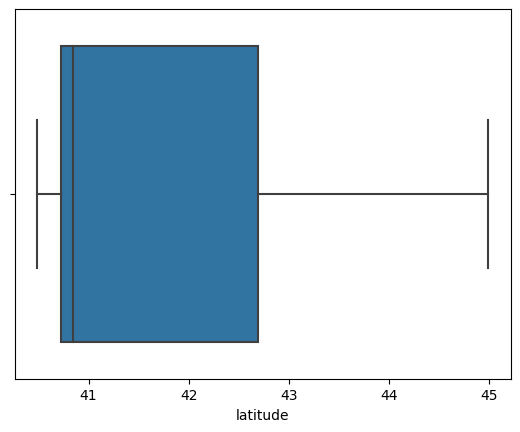

In [29]:

# observamos no que hay outliers en latitude
sns.boxplot(x=dfmetadata_NY['latitude'], data = dfmetadata_NY)
plt.show()

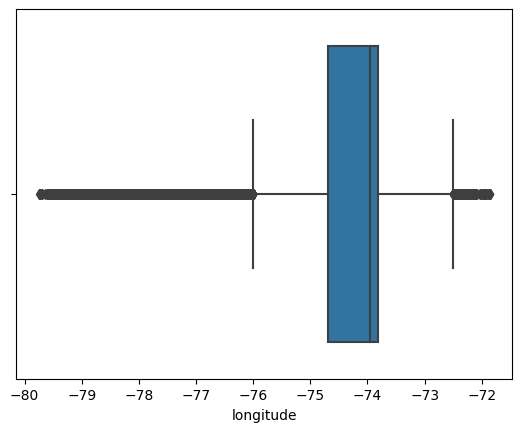

In [30]:
sns.boxplot(x=dfmetadata_NY['longitude'], data = dfmetadata_NY)
plt.show()

In [68]:
# Eliminar las filas con valores None en la columna 'category'
dfmetadata_NY.dropna(subset=['category'], inplace=True)

In [69]:

# Convertir la columna 'category' en una lista plana y contar la frecuencia de cada categoría
frecuencia_categorias = pd.Series([category for sublist in dfmetadata_NY['category'] for category in sublist]).value_counts()

# Obtener las 20 primeras categorías más repetidas
categorias_mas_repetidas = frecuencia_categorias.head(25)

print(categorias_mas_repetidas)

Restaurant              4293
Auto repair shop        2521
Beauty salon            2144
Nail salon              2030
Delivery Restaurant     1932
Bar                     1868
Barber shop             1836
Hair salon              1766
Deli                    1643
Pizza restaurant        1625
Chinese restaurant      1495
Grocery store           1451
Fast food restaurant    1388
Park                    1369
Gas station             1352
Clothing store          1343
Takeout Restaurant      1325
Coffee shop             1282
Tourist attraction      1247
Bakery                  1200
Cafe                    1189
Convenience store       1148
Cell phone store        1138
Sandwich shop           1113
Liquor store            1033
dtype: int64


In [74]:
#creamos una lista con las categorías gastronomicas con mayor numero de reviews
lista_categorias = ['Restaurant', 'Bar', 'Deli', 'Grocery', 'Coffee', 'Bakery', 'Sandwich']

In [75]:
# Convertir la lista de categorías en un patrón de búsqueda con el operador OR (|)
patron_busqueda = '|'.join(lista_categorias)

# Filtrar el DataFrame manteniendo solo las filas que contienen alguna de las palabras en la lista 'lista_categorias'
gastro_NY = dfmetadata_NY[dfmetadata_NY['category'].apply(lambda x: any(item in x for item in lista_categorias))]


In [76]:
gastro_NY.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
742,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,Long-running chain serving signature breakfast...,40.763985,-73.771430,"[Coffee shop, Bagel shop, Bakery, Breakfast re...",3.5,8,$,"[[Thursday, 6AM–7PM], [Friday, 6AM–7PM], [Satu...","{'Service options': ['Delivery', 'Takeout', 'D...",Open ⋅ Closes 7PM,"[0x89c3ab9229879ec3:0x3f4b2b46d7d2c503, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
903,Raffaello Kosher Pizza,"Raffaello Kosher Pizza, 37 W 46th St, New York...",0x89c258ffaeaba947:0x8355860772a595a9,This casual joint serves up traditional Italia...,40.756872,-73.980427,[Restaurant],3.4,8,None,None,"{'Service options': ['Delivery'], 'Offerings':...",None,"[0x89c2f41bdce4dc0f:0xf4e3f717a4950ea3, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
3376,Caliente Cab Co,"Caliente Cab Co, 488 3rd Ave, New York, NY 10016",0x89c259063d62f499:0x5b5cab85882fd605,Potent drinks & a spacious patio are the main ...,40.745304,-73.978768,"[Restaurant, Mexican restaurant]",3.6,36,$$,"[[Wednesday, 12PM–1AM], [Thursday, 12PM–2AM], ...",{'Service options': ['Delivery']},Permanently closed,"[0x89c259937544d0df:0x5ffd85b9db5839c2, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
4475,李小龍台吃,"〒11362 New York, Queens, Northern Blvd, 李小龍台吃",0x89c289efdb82221b:0xed627c2af97c2069,None,40.770059,-73.735522,[Restaurant],4.0,27,None,"[[Wednesday, 11:30AM–10PM], [Thursday, 11:30AM...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11:30AM Thu,"[0x89c289efe0d5d521:0xb30eff4172713bd6, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
5808,Cantina 62 Mexican Express,"Cantina 62 Mexican Express, 727 Maple Rd, Buff...",0x89d373c8b21aef8b:0x598a1da29c705118,None,42.990721,-78.760377,[Restaurant],4.2,8,None,"[[Wednesday, 11AM–12AM], [Thursday, 11AM–12AM]...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 12AM,None,https://www.google.com/maps/place//data=!4m2!3...


In [77]:
gastro_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8363 entries, 742 to 3024957
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8363 non-null   object 
 1   address           8360 non-null   object 
 2   gmap_id           8363 non-null   object 
 3   description       2885 non-null   object 
 4   latitude          8363 non-null   float64
 5   longitude         8363 non-null   float64
 6   category          8363 non-null   object 
 7   avg_rating        8363 non-null   float64
 8   num_of_reviews    8363 non-null   int64  
 9   price             4586 non-null   object 
 10  hours             7849 non-null   object 
 11  MISC              8271 non-null   object 
 12  state             7874 non-null   object 
 13  relative_results  7547 non-null   object 
 14  url               8363 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.0+ MB


In [101]:
#hay 1265 locales repetidos 
gastro_NY['name'].nunique()

7098

In [81]:
gastro_NY.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,8363.000000,8363.000000,8363.00000,8363.000000
mean,41.402076,-74.465934,4.20794,98.274303
std,1.019312,1.476205,0.43003,253.810753
min,40.509372,-79.576958,1.50000,5.000000
25%,40.719855,-74.057071,4.00000,28.000000
50%,40.803427,-73.950470,4.30000,53.000000
75%,42.137311,-73.808922,4.50000,88.000000
max,44.990914,-71.919502,5.00000,9998.000000


In [80]:
#sitios con mayores reviews
gastro_NY.nlargest(n=10, columns='num_of_reviews')

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2736434,Katz's Delicatessen,"Katz's Delicatessen, 205 E Houston St, New Yor...",0x89c2598f7ff4aa09:0x313547e757cb8cea,No-frills deli with theatrically cranky servic...,40.722233,-73.987429,"[Jewish restaurant, Restaurant, Sandwich shop]",4.5,9998,₩₩,"[[Wednesday, 8AM–10:45PM], [Thursday, 8AM–10:4...","{'Service options': ['Delivery', 'Takeaway', '...",Closed ⋅ Opens 8AM,"[0x89c2590682fcf747:0x65207423b3d2f575, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2701812,Resorts World Casino New York City,"Resorts World Casino New York City, 110-00 Roc...",0x89c2674340dbd021:0x5982f3f892a92c6c,JFK-airport-area casino featuring slots & tabl...,40.672710,-73.832796,"[Casino, Event venue, Night club, Restaurant, ...",3.7,9538,None,"[[Saturday, 9AM–5AM], [Sunday, 9AM–5AM], [Mond...",{'Accessibility': ['Wheelchair-accessible car ...,Open ⋅ Closes 5AM Sun,"[0x89c2f2be1e41bb87:0xe982e5bcc05311e2, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2626178,McDonald's,"McDonald's, 160 Broadway, New York, NY 10038, ...",0x89c25a177d4bf5db:0x84e51f23e8c0a75c,"Classic, long-running fast-food chain known fo...",40.709479,-74.010036,"[Fast food restaurant, Breakfast restaurant, C...",3.8,4210,₩,"[[Monday, Open 24 hours], [Tuesday, Open 24 ho...","{'Service options': ['No-contact delivery', 'D...",Open 24 hours,"[0x89c25a1f577fb1b3:0x812e88721aa0f74e, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2607414,Tavern On the Green,"Tavern On the Green, W 67th St, New York, NY 1...",0x89c258f4bf692e2b:0xe7a80a896e96aa05,Restored Central Park icon for American fare i...,40.772260,-73.977690,"[American restaurant, Restaurant]",4.4,4143,₩₩₩,"[[Tuesday, 11AM–9PM], [Wednesday, 11AM–9PM], [...","{'Service options': ['Outdoor seating', 'Dine-...",Closed ⋅ Opens 11AM Wed,"[0x89c258f09402cca3:0x1c8b5713f760759b, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2544927,Cracker Barrel Old Country Store,"Cracker Barrel Old Country Store, 4 Merritt Bl...",0x89dd3700e2855f4f:0x4175084e14cb58d3,Homey chain restaurant serving American comfor...,41.529570,-73.892206,"[American restaurant, Gift shop, Hobby store, ...",4.3,3865,$$,"[[Thursday, 7AM–9PM], [Friday, 7AM–10PM], [Sat...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 7AM,"[0x89dd371ad98530b1:0x13758d94f02f8ccf, 0x89dd...",https://www.google.com/maps/place//data=!4m2!3...
2588342,La Casa Del Mofongo,"La Casa Del Mofongo, 1447 St Nicholas Ave, New...",0x89c2f41e5dfffd1f:0x147cb2abd8728f93,"Lively hot spot for Dominican fare, including ...",40.850345,-73.933238,"[Dominican restaurant, Bar, Latin American res...",4.1,3512,₩₩,"[[Wednesday, 11AM–11PM], [Thursday, 11AM–11PM]...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 11AM,"[0x89c2f43415b0d4d3:0xfafb13ac7c64ee01, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2432501,IHOP,"IHOP, 235 E 14th St # 237, New York, NY 10003,...",0x89c2599e515bf4dd:0x4f079e048a26869d,Long-standing chain serving a wide variety of ...,40.732925,-73.985508,"[Restaurant, American restaurant, Breakfast re...",4.0,3199,$,"[[Saturday, Open 24 hours], [Sunday, Open 24 h...","{'Service options': ['Delivery', 'Takeaway', '...",Open 24 hours,"[0x89c259821bab0de1:0xc97c4df9856335f1, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2704494,Inwood Bar & Grill,"Inwood Bar & Grill, 4892 Broadway, New York, N...",0x89c2f3f7a3f88dad:0xbff230b053384a58,Sports bar & restaurant serving American fare ...,40.867056,-73.922457,"[Sports bar, Bar & grill, Event venue, Night c...",4.6,2954,₩₩,"[[Saturday, 11AM–11PM], [Sunday, 11AM–11PM], [...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 11PM,"[0x89c2f3f883d5749d:0xbcaa40de8be83b38, 0x89c2...",https://www.google.com/maps/place//data=!4m2!3...
2505394,Buddakan,"Buddakan, 75 9th Ave, New York, NY 10011

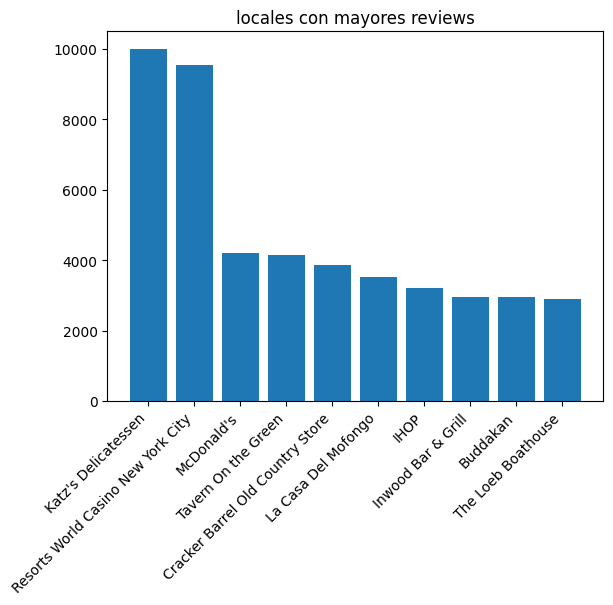

In [86]:
#Sitios con mayor cantidad de reviews
gastro_NY_top10 = gastro_NY.sort_values(by='num_of_reviews', ascending=False).head(10)

plt.bar(gastro_NY_top10['name'], gastro_NY_top10['num_of_reviews'])
plt.xticks(rotation=45, ha='right')
plt.title('locales con mayores reviews')
plt.show()

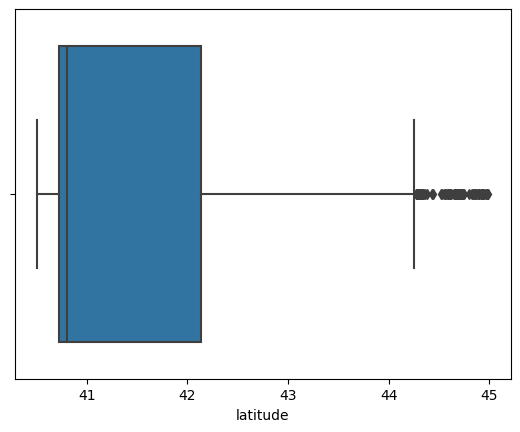

In [82]:

# observamos no que hay outliers en latitude
sns.boxplot(x=gastro_NY['latitude'], data = gastro_NY)
plt.show()

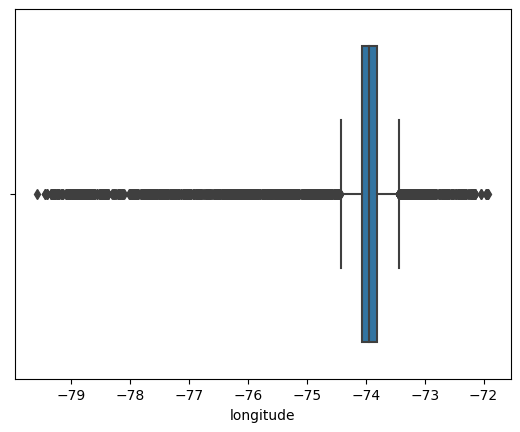

In [83]:

# observamos no que hay outliers en latitude
sns.boxplot(x=gastro_NY['longitude'], data = gastro_NY)
plt.show()

In [89]:
# Utilizar 'explode' para desglosar las listas de categorías en filas individuales
df_exploded = gastro_NY.explode('category')

# Agrupar el DataFrame por la columna 'category' y sumar los valores de 'num_of_reviews' para cada categoría
reviews_por_categoria = df_exploded.groupby('category')['num_of_reviews'].sum()

# Ordenar las categorías por el número de reviews en orden descendente
categorias_con_mas_reviews = reviews_por_categoria.sort_values(ascending=False).head(20)

print(categorias_con_mas_reviews)

category
Restaurant              504208
Bar                     199971
Fast food restaurant    126922
Bakery                  108373
Deli                     97624
Breakfast restaurant     94978
American restaurant      94859
Sandwich shop            94606
Coffee shop              85143
Hamburger restaurant     79193
Takeout Restaurant       67374
Caterer                  44558
Bar & grill              36297
Delivery Restaurant      36222
Italian restaurant       36211
Bagel shop               33976
Pizza restaurant         32316
Cafe                     32308
Grocery store            32037
Family restaurant        31889
Name: num_of_reviews, dtype: int64
